In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as intg
from itertools import combinations,permutations

# Spectral Analysis
### David Paipa - M2 IRT 

## Defining the Chebyshev polynomials

Creating a process that generates the coefficients of the polynomials and then returns a function element corresponding to the reauested polynomial.

In [2]:
# genenrqtes q matrix with the chebyshev polynomial coefficients
def generate_chebyshev(n,func_type=1):
    # a new array for polynomials up to n degree to store coefficients
    ans = np.zeros([n+1,n+1]) 
    
    ans[0,0] = 1
    
    ans[1,1] = func_type
    
    for i in range(2,n+1):
        ans[i,1:] = 2 * ans[i-1,:-1] 
        ans[i,:] = ans[i,:] - ans[i-2,:]
    return ans

#given a coefficient ,atrix, returns the coefficients of the derivative of each polynomial
def derivate_coefs(coefs):
    new_c = np.zeros([len(coefs),len(coefs)])
    for p in range(len(coefs)):
        for i in range(len(coefs)-1):
            new_c[p][i] = coefs[p][i+1]*(i+1)
    return new_c


# generate a polynomial given the coefficients
def generate_poly(coefs):
    def func(x):
        total = 0
        for j in range(len(coefs)):
            total = total + (coefs[j])*(x**j)
        return total
    return func

# using generated coefficients, generate a polynomial python function; can be evluated over any x
def func_chebyshev(coefs,func_type=1):
    funcs = []
    for i in range(len(coefs)):  
        
        # get coefficients of i-th polynomial
        cc = coefs[i,:]
        
        #print(cc)
        func_n = generate_poly(cc)
        funcs.append(func_n)
    return funcs


In [3]:
x_space = np.linspace(-1,1,1000) 
m_pols = 10 # max degree of polynomial basis (m_pols+1 polynomials)

chebyshev_coefs = generate_chebyshev(m_pols)
pols_list = func_chebyshev(chebyshev_coefs)

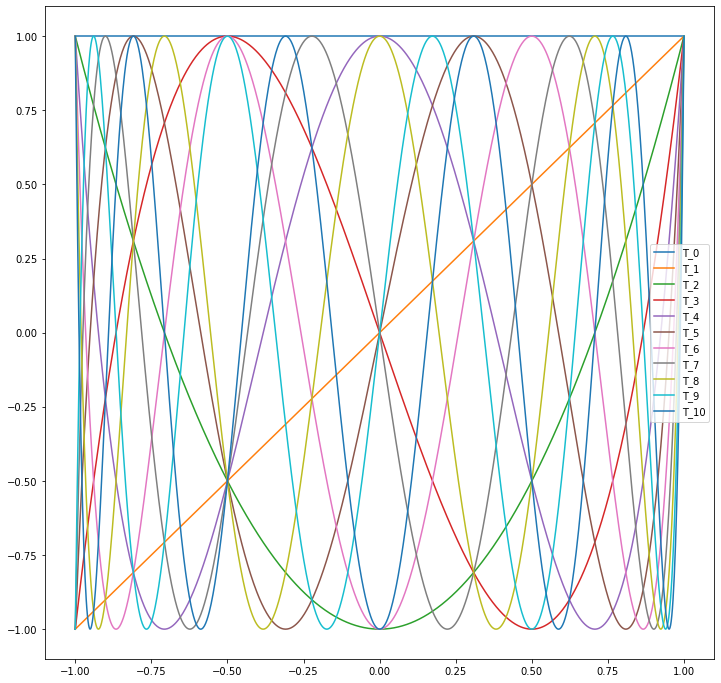

In [4]:
plt.figure(figsize=(12,12))
for i in range(m_pols+1):
    f = pols_list[i]
    
    y = f(x_space)
    plt.plot(x_space,y,label="T_%.d"%(i))
plt.legend()
plt.show()

##  Checking orthogonality of Chebyshev polynomials 

For each pair possible among the generated polynomials the inner products are calculated within the proposed interval.

In [5]:
answer = [] # storing the projection data

# storing the polynomial functions combinations to evaluate
comb_pols = list(combinations([i for i in range(len(pols_list)) ] ,2)) + [(i,i) for i in range(len(pols_list))]


# for eqch 
for c in comb_pols:
    f1 = pols_list[c[0]]
    f2 = pols_list[c[1]]
    
    def new_fun(x):
        return f1(x)*f2(x)/np.sqrt(1-x*x)
    
    res,error = intg.quad(new_fun,-1,1)
    answer.append([c,res,error])
    
    print("< T_%.d , T_%.d > = %.2e , error = %.2e "%(c[0],c[1],res,error))
    
    

< T_0 , T_1 > = 0.00e+00 , error = 2.14e-14 
< T_0 , T_2 > = -2.05e-13 , error = 7.18e-09 
< T_0 , T_3 > = 0.00e+00 , error = 2.11e-14 
< T_0 , T_4 > = -5.32e-12 , error = 5.78e-11 
< T_0 , T_5 > = 0.00e+00 , error = 2.14e-14 
< T_0 , T_6 > = -2.03e-12 , error = 8.48e-10 
< T_0 , T_7 > = 0.00e+00 , error = 1.96e-14 
< T_0 , T_8 > = -1.88e-12 , error = 6.74e-09 
< T_0 , T_9 > = 0.00e+00 , error = 2.12e-14 
< T_0 , T_10 > = 3.86e-12 , error = 2.09e-09 
< T_1 , T_2 > = 0.00e+00 , error = 1.28e-14 
< T_1 , T_3 > = 5.87e-12 , error = 2.35e-11 
< T_1 , T_4 > = 0.00e+00 , error = 1.31e-14 
< T_1 , T_5 > = -2.07e-12 , error = 4.46e-10 
< T_1 , T_6 > = 0.00e+00 , error = 1.34e-14 
< T_1 , T_7 > = -2.06e-12 , error = 3.76e-09 
< T_1 , T_8 > = 0.00e+00 , error = 1.34e-14 
< T_1 , T_9 > = 3.11e-12 , error = 1.26e-09 
< T_1 , T_10 > = 0.00e+00 , error = 1.40e-14 
< T_2 , T_3 > = 0.00e+00 , error = 1.31e-14 
< T_2 , T_4 > = -2.14e-12 , error = 4.27e-10 
< T_2 , T_5 > = 0.00e+00 , error = 1.33e-14 
<

As we can see, $<T_n$,$T_m>_w$ $\approx$

* 0  if  $n \neq m$ 
* $\pi$ ~ 3.14  if  $n = m = 0$ 
* $\pi/2$ ~ 1.57 if  $n = m \neq 0$ 

The precision in this results seems good enough to claim that the orthogonality properties are observed ( error around 1e-9).

## Projection of an arbitrary function

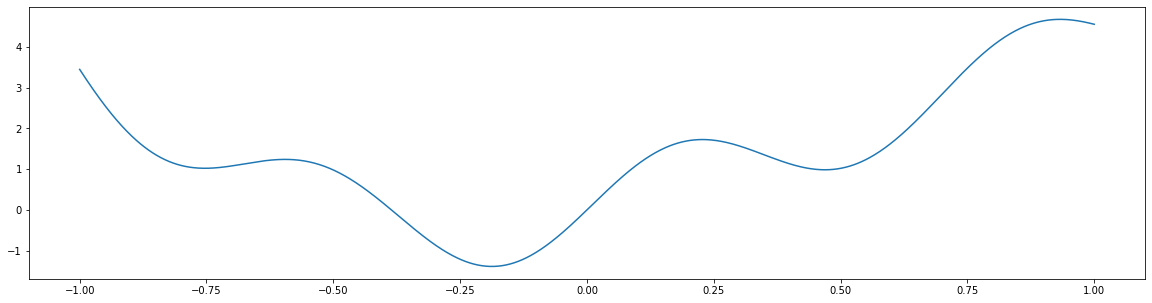

In [6]:
# defining n arbitrary function and plotting it in the interval
def r_func(x):
    return np.cos(3*x) * 2*np.sin(6*x) + 4*x**2

# analitical derivative 
def r_func_deriv(x):
    return 8*x - 6*np.sin(6*x)*np.sin(3*x)+12*np.cos(3*x)*np.cos(6*x)
r_y = r_func(x_space) 

plt.figure(figsize=(20,5))
plt.plot(x_space,r_y)

In [7]:
def project_function(f,pols,eps=1e-6):
    # storing the coefficients for projection
    coefs = []
    
    
    for i in range(len(pols)):
        Ti = pols_list[i] # for eqch base polynomial
        
        # calculate the inner product with the arbitrary function
        def new_fun(x):
            return Ti(x)*r_func(x)/np.sqrt(1-x*x)
        # calculate the norm of the polynomial 
        def norm_fun(x):
            return Ti(x)*Ti(x)/np.sqrt(1-x*x)

        # integrate to calculate the inner products
        res,error = intg.quad(new_fun,-1,1,epsabs=eps)
        res_norm,error_norm = intg.quad(norm_fun,-1,1,epsabs=eps)
        
        # append the coefficient of projection for the i-th polynomial
        coefs.append(res/res_norm)

    # create the projected function as a linear combination of the m polynomials 
    def new_fun(x):
        total = 0
        for i in range(len(coefs)):
            total = total + coefs[i]*pols[i](x)
        return total
    
    return new_fun
            

In [8]:
# create the projected fucntion and evaluate it the interval
proj_fun = project_function(r_func,pols_list)
y_proj = proj_fun(x_space)

/home/localuser/Documents/Classes/HPC/hpc_env/lib/python3.7/site-packages/ipykernel_launcher.py:17: IntegrationWarning: The integral is probably divergent, or slowly convergent.


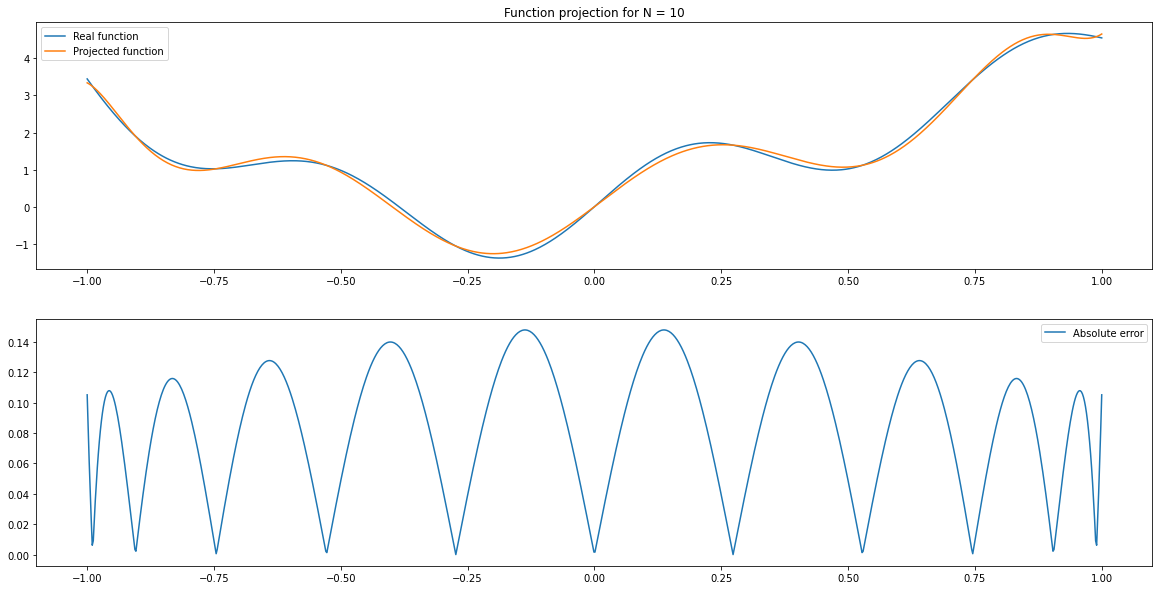

In [9]:
plt.figure(figsize=(20,10))

plt.subplot(2,1,1)
plt.plot(x_space,r_y, label="Real function")
plt.plot(x_space,y_proj, label="Projected function")
plt.legend()
plt.title("Function projection for N = %.d"%(m_pols))


plt.subplot(2,1,2)
plt.plot(x_space,abs(r_y-y_proj), label="Absolute error")
plt.legend()



## Computing spectral interpolant

In [10]:
# generate weights and colloc for a given index 
def get_weight_colloc(idx,m):
    wght = 0
    cllc = 0
    m=m-1
    
    if idx == 0 or idx == m:
        wght, cllc = [np.pi/(2*m), -np.cos(idx*np.pi/m)]
    else:
        wght, cllc = [np.pi/m, -np.cos(idx*np.pi/m)]
        
    return [wght,cllc]
        
# generate gamma for given index
def get_gamma(idx,pols):

    total = 0
    for i in range(len(pols)):
        wght,cllc = get_weight_colloc(i,len(pols))
        total = total + ( (pols[idx](cllc))**2 ) * wght
    return total
    
# generate fn for any function and index
def get_fn(idx,f,pols):
    gamma = get_gamma(idx,pols)
    total = 0
    
    for i in range(len(pols)):
        wght,cllc = get_weight_colloc(i,len(pols))
        total = total + f(cllc)*pols[idx](cllc) * wght
    
    return total/gamma


def get_f_coefs(f,pols):
    fs = []
    for i in range(len(pols)):
        fn = get_fn(i,f,pols)
        fs.append(fn)
    return fs
# generate the interpolant function of any function f

def get_interpolant(f_coefs,pols):
    if(len(f_coefs)!=len(pols)):
        print("Different number of polynomials and coefficients : ",len(pols)," - ",len(f_coefs))
    
    def interpolant(x):
        total = 0
        for i in range(len(pols)):
            fn = f_coefs[i]
            total = total + fn * pols[i](x)
        return total
    return interpolant

In [11]:
# generate function and evaluate in interval 
fvals = get_f_coefs(r_func,pols_list)
int_r_func = get_interpolant(fvals,pols_list)
y_inter = int_r_func(x_space)

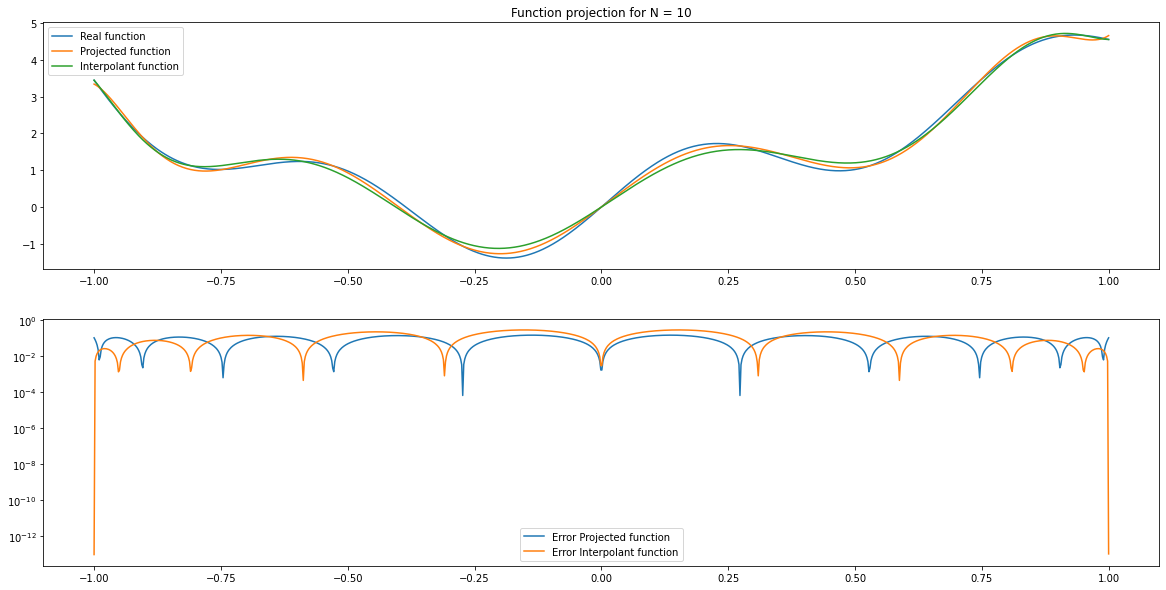

In [12]:
plt.figure(figsize=(20,10))

plt.subplot(2,1,1)
plt.plot(x_space,r_y, label="Real function")
plt.plot(x_space,y_proj, label="Projected function")
plt.plot(x_space,y_inter, label="Interpolant function")
plt.legend()
plt.title("Function projection for N = %.d"%(m_pols))
plt.subplot(2,1,2)
plt.plot(x_space,abs(r_y-y_proj), label="Error Projected function")
plt.plot(x_space,abs(r_y-y_inter), label="Error Interpolant function")
plt.yscale("log")
plt.legend()

## Verifying spectral convergence

In [13]:
def error_MSE(y,y_pred): # Mean Squared Error Function
    return np.mean((y-y_pred)**2)

def error_max(y,y_pred):
    return np.max(np.abs(y-y_pred))

In [14]:
MSE_errors = []
max_errors = []

m_pols = 25 # max degree of polynomial basis (m_pols+1 polynomials)
chebyshev_coefs = generate_chebyshev(m_pols)
pols_list = func_chebyshev(chebyshev_coefs)

for m in range(2,m_pols+1):
    fv = get_f_coefs(r_func,pols_list[:m])
    int_r_func = get_interpolant(fv,pols_list[:m])
    y_pred = int_r_func(x_space)
    MSE_errors.append(error_MSE(r_y,y_pred))
    max_errors.append(error_max(r_y,y_pred))
    

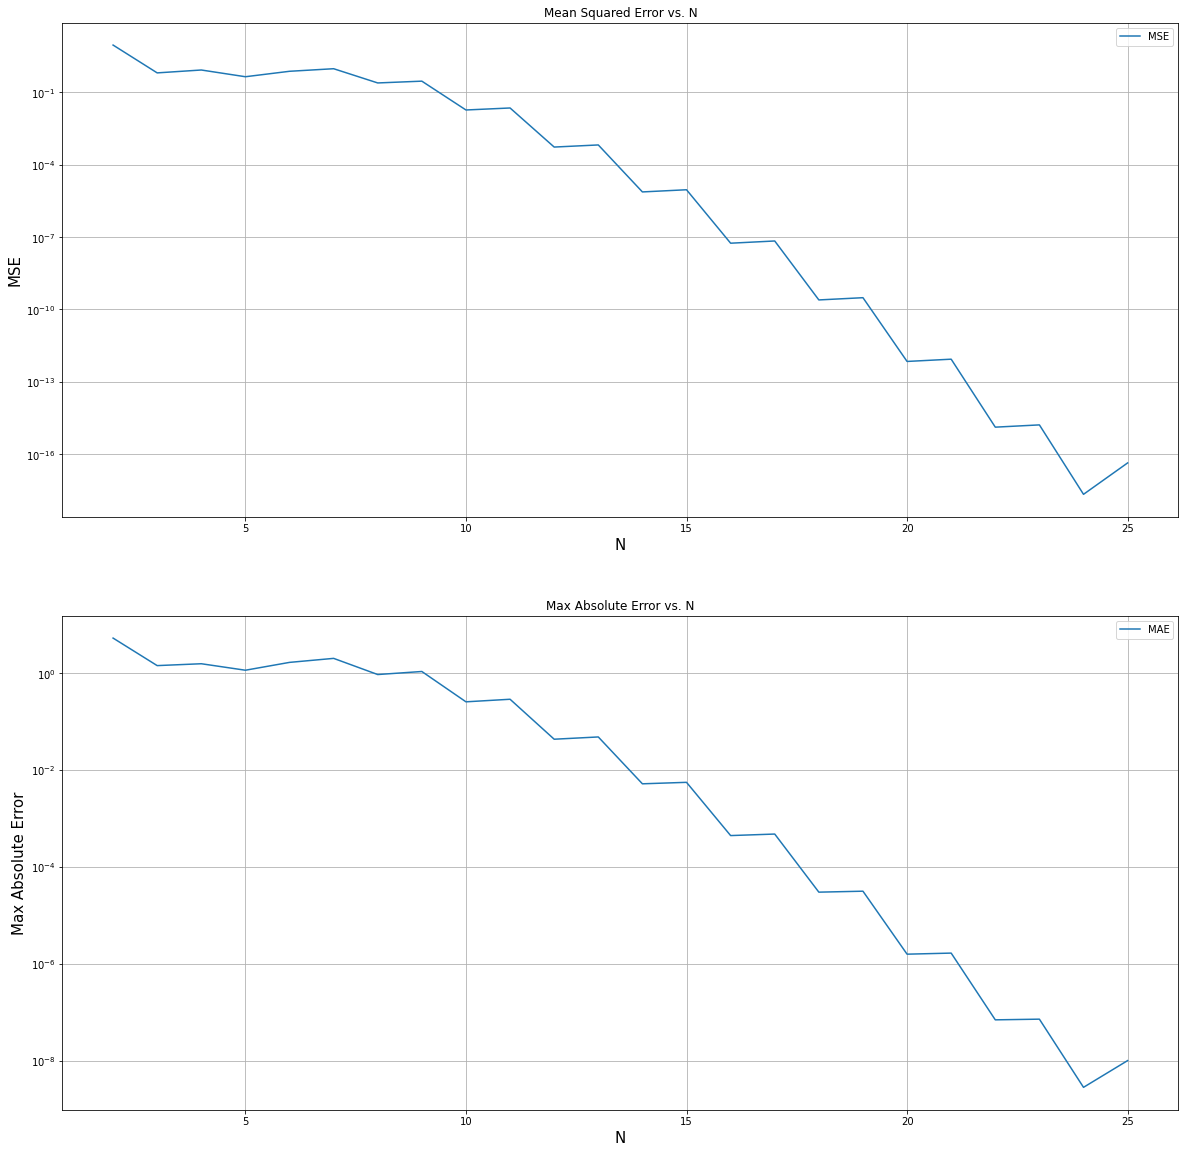

In [15]:
plt.figure(figsize=(20,20))

plt.subplot(2,1,1)
plt.title("Mean Squared Error vs. N")
plt.plot(list(range(2,m_pols+1)),MSE_errors,label = "MSE")
plt.xlabel("N",fontsize=15)
plt.yscale("log")
plt.ylabel("MSE",fontsize=15)
plt.grid()
plt.legend()

plt.subplot(2,1,2)
plt.title("Max Absolute Error vs. N")
plt.plot(list(range(2,m_pols+1)),max_errors,label = "MAE")
plt.xlabel("N",fontsize=15)
plt.ylabel("Max Absolute Error",fontsize=15)
plt.yscale("log")
plt.grid()
plt.legend()

## Approximation of the derivative

In [16]:
deriv_coefs = derivate_coefs(chebyshev_coefs) # derivate the existing coefficient matrix
deriv_pols_list = func_chebyshev(deriv_coefs[:]) # generate the corresponding functions 



# generate interpolant with the same f coefficients
fvals = get_f_coefs(r_func,pols_list)
deriv_interp = get_interpolant(fvals,deriv_pols_list)

In [17]:
deriv_y = deriv_interp(x_space) # interpolant y
analytical_y = r_func_deriv(x_space) # analytical y

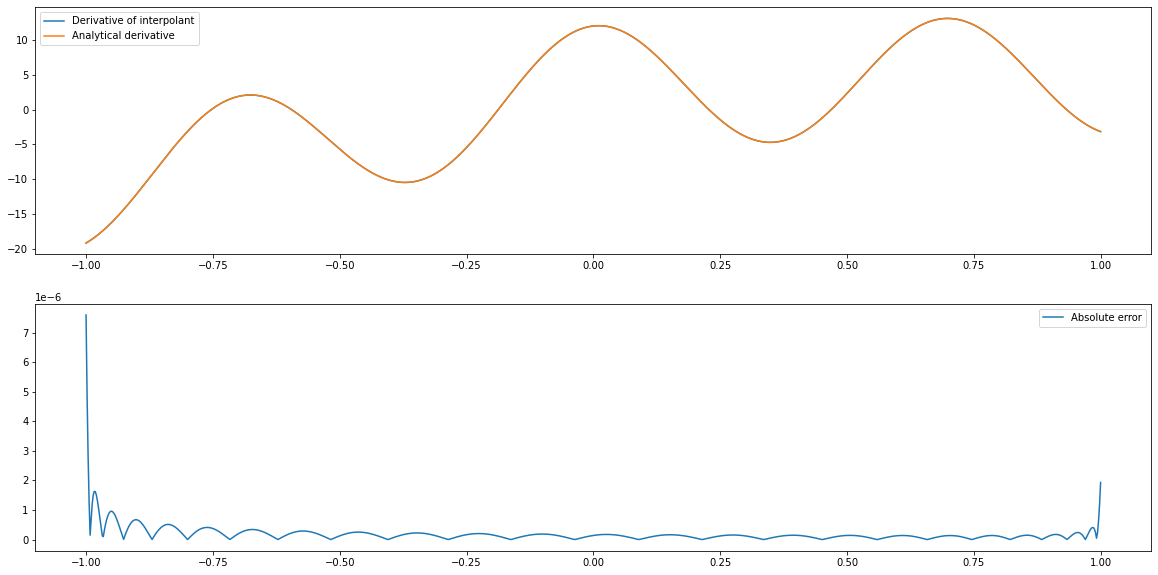

In [18]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.plot(x_space,deriv_y,label="Derivative of interpolant")
plt.plot(x_space,analytical_y,label="Analytical derivative")
plt.legend()
plt.subplot(2,1,2)
plt.plot(x_space,abs(deriv_y-analytical_y),label="Absolute error")
plt.legend()

### Spectral convergence of derivative

In [19]:
MSE_errors = []
max_errors = []

for m in range(2,m_pols+1):
    fv = get_f_coefs(r_func,pols_list[:m]) # gen f coeff for the polynomials
    int_r_func = get_interpolant(fv,deriv_pols_list[:m]) # use the coefficients on the derivate of Pn
    y_pred = int_r_func(x_space)
    
    MSE_errors.append(error_MSE(analytical_y,y_pred))
    max_errors.append(error_max(analytical_y,y_pred))

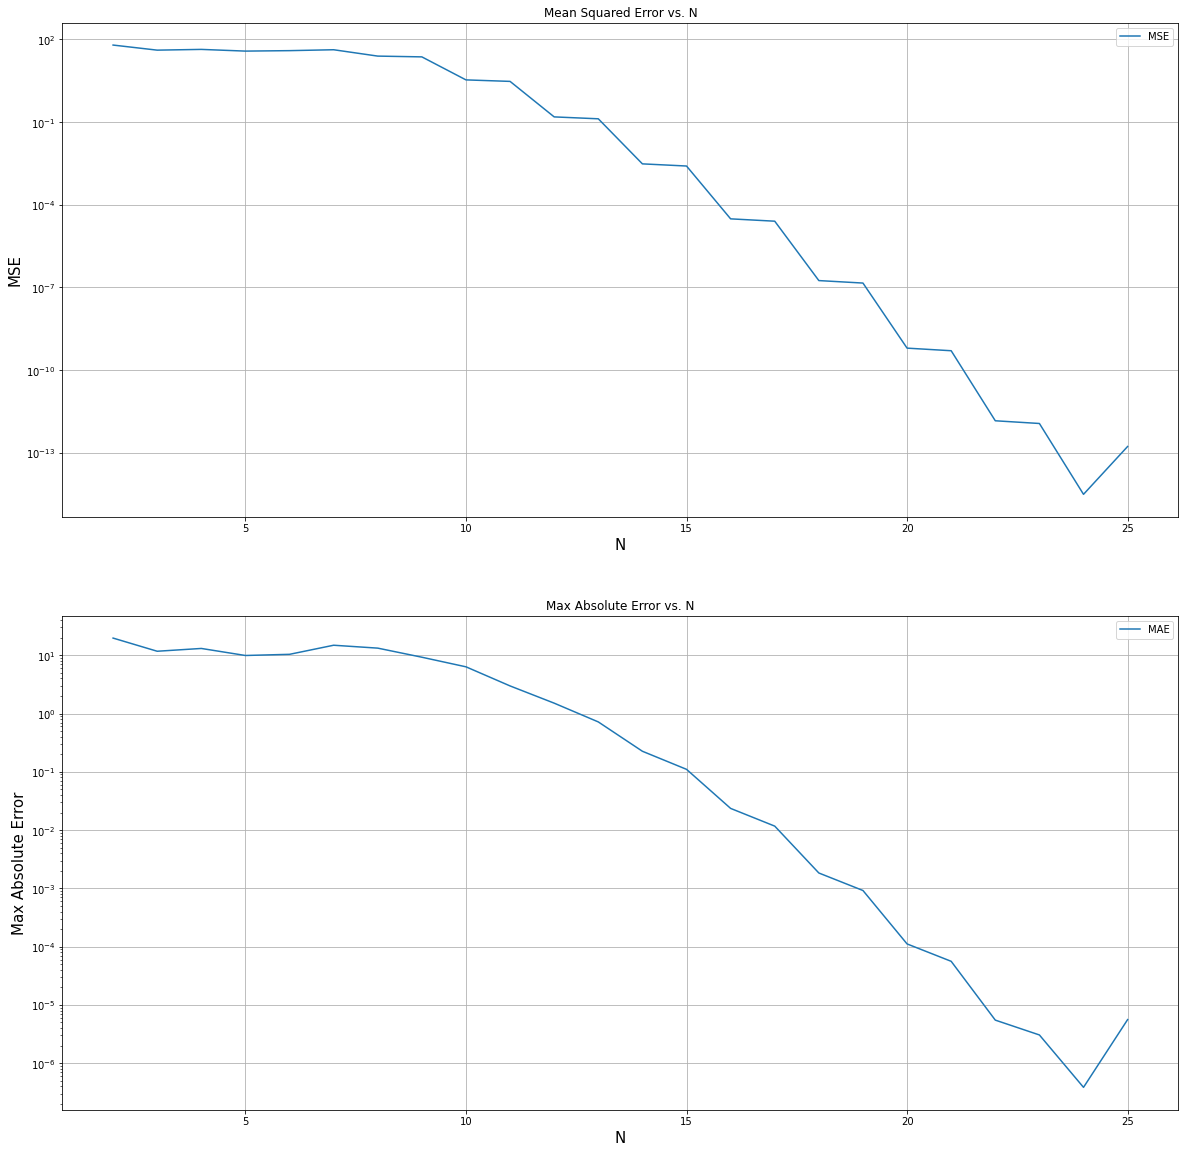

In [20]:
plt.figure(figsize=(20,20))

plt.subplot(2,1,1)
plt.title("Mean Squared Error vs. N")
plt.plot(list(range(2,m_pols+1)),MSE_errors,label = "MSE")
plt.xlabel("N",fontsize=15)
plt.yscale("log")
plt.ylabel("MSE",fontsize=15)
plt.grid()
plt.legend()

plt.subplot(2,1,2)
plt.title("Max Absolute Error vs. N")
plt.plot(list(range(2,m_pols+1)),max_errors,label = "MAE")
plt.xlabel("N",fontsize=15)
plt.ylabel("Max Absolute Error",fontsize=15)
plt.yscale("log")
plt.grid()
plt.legend()

We can confirm spectral convergence in both cases (the function and its derivative) around N = 24 where the error is minimized 